# _Dataquest: The Mode_

This notebook was adapted from Dataquest's lesson _The Mode_ within their probability and statistics chapter. 

In [1]:
# load in data
import pandas as pd

# read in Ames housing txt file
houses = pd.read_csv('data/AmesHousing_1.txt', sep = '\t')

In [4]:
# explore the first five observations in Land Slope column to find its scale of measurement
houses['Land Slope'][:5]

0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
Name: Land Slope, dtype: object

In [13]:
# what are the unique values within this column?
houses['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

## _Documentation: `Land Slope` column_

- Land Slope: slope of the property
    - `Gtl` --> Gentle slope
    - `Mod` --> Moderate slope
    - `Sev` --> Severe slope

In [5]:
# what is the scale of measurement for the Land Slope column?
scale_land = 'ordinal'

In [6]:
# explore the Roof Style variable and find its scale of measurement
houses['Roof Style'][:5]

0      Hip
1    Gable
2      Hip
3      Hip
4    Gable
Name: Roof Style, dtype: object

## _Documentation: `Roof Style` column_

- Roof style: type of roof
    - `Flat` --> flat
    - `Gable` --> gable
    - `Gambrel` --> gabrel (barn)
    - `Hip` --> hip
    - `Mansard` --> mansard
    - `Shed` --> shed

In [ ]:
# what is the scale of measurement for the Roof Style variable? 
scale_roof = 'nominal'

In [11]:
# explore the Kitchen AbvGr variable and determine whether it's continuous or discrete
round(houses['Kitchen AbvGr'].value_counts(normalize=True) * 100, 4)

1    95.4266
2     4.4027
0     0.1024
3     0.0683
Name: Kitchen AbvGr, dtype: float64

In [12]:
# is the Kitchen AbvGr continuous or discrete?
kitchen_variable = 'discrete'

## _The Mode for Ordinal Variables_

- the most frequent value in the distribution --> *the mode*
- no standard notation for the node, and is not defined algebraically

In [46]:
# write a function that takes in an array of values and returns the mode of the array
def mode(array):
    '''
    Takes in array of values (including strings) and returns mode of the array.
    '''
    # initialize an empty dictionary
    dictionary = dict()
    # for loop that generates keys and counts
    for val in array:
        if val in dictionary.keys():
            dictionary[val] += 1
        else:
            dictionary[val] = 1
    # return the key with the highest count
    high_count = max(dictionary, key=dictionary.get)
    return high_count

# using above function measure the mode of the Land Slope variable
mode_function = mode(houses['Land Slope'])

# using the mode() method, measure the mode of the Land Slope variable
mode_method = houses['Land Slope'].mode()

# check to see whther the two values are the same
same = mode_function == mode_method

## _The Mode for Nominal Variables_

- learned that mode is ideal for ordinal data represented by words
    - is also a good choice for nominal data
- `Roof Style` variable --> measured on a nominal scale
    - describe qualities, not quantities
    - no inherent order of the values in the distribution
        - can't sort the values in ascending/descending order


In [47]:
# edit the above function to return both mode and dictionary counting the counts
def mode(array):
    '''
    Takes in array of values (including strings) and returns mode of the array.
    '''
    # initialize an empty dictionary
    dictionary = dict()
    # for loop that generates keys and counts
    for val in array:
        if val in dictionary:
            dictionary[val] += 1
        else:
            dictionary[val] = 1
    # return the key with the highest count
    high_count = max(dictionary, key=dictionary.get)
    return high_count, dictionary

In [48]:
# return the mode and dictionary and store in two variables
mode, value_counts = mode(houses['Roof Style'])

In [49]:
# check value counts
from collections import OrderedDict

sorted(value_counts.items(), key=operator.itemgetter(1), reverse=True)

[('Gable', 2321),
 ('Hip', 551),
 ('Gambrel', 22),
 ('Flat', 20),
 ('Mansard', 11),
 ('Shed', 5)]

In [50]:
houses['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

## _The Mode for Discrete Variables_

- some cases where mean/median is possible and correct, but mode is preferred
- variables measured on interval or ratio scales be be --> discrete or continuous
    - reminder --> discrete variable is when there's no possible intermediate values between two adjacent values
- the mode guarantees a whole number from the distribution --> also guaranteed to be a value from the distribution
    - this doesn't apply to the mean or the median, which can return values that re not present in the actual distribution

In [51]:
# explore the Bedroom AbvGr variable
houses['Bedroom AbvGr'].value_counts()

3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: Bedroom AbvGr, dtype: int64

In [52]:
# is the Bedroom AbvGr variable a discrete or continuous variable?
bedroom_variable = 'discrete'

# what is the mode of the above variable? 
bedroom_mode = houses['Bedroom AbvGr'].mode()

In [55]:
# find whether SalePrice variable is discrete or continuous
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [56]:
# assign the variable type of SalePrice to a variable
price_variable = 'continuous'

# what is the mode of the SalePrice column?
price_mode = None

## _Special Cases_

- some distributions can have more than one mode
    - bimodal --> distribution has 2 modes
    - unimodal --> distribution has 1 mode
    - not unusual to have 2+ modes (i.e., multimodel)
    - also instances where there is no mode at all
- distributions without a mode are often specific to continuous variables
    - rare to find two identical values, espcially if they are decimal numbers
    - workaround --> organize into grouped frequency table, then select bin with highest frequency
        - has limits but generally gives reasonable answers

In [57]:
# grouped frequency table for SalePrice variable
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [58]:
# what is the midpoint of the class interval with the highest frequency
mode = 150000

# what is the mean of the SalePrice column?
mean = houses['SalePrice'].mean()

# what is the median of the SalePrice column?
median = houses['SalePrice'].median()

In [59]:
print('Mode: {}\nMean: {}\nMedian: {}'.format(mode, mean, median))

Mode: 150000
Mean: 180796.0600682594
Median: 160000.0


In [60]:
# is the mode lower than the median, and the median lower than the mean?
sentence_1 = True

# us the mean grater than the median, and the median greater than the mode?
sentence_2 = True

## _Skewed Distributions_

- mode will always be the peak of a distribution (when we plot via histogram or kernel density plot)
- the code below plots a kernel density plot to visualize the same of `SalePrice`

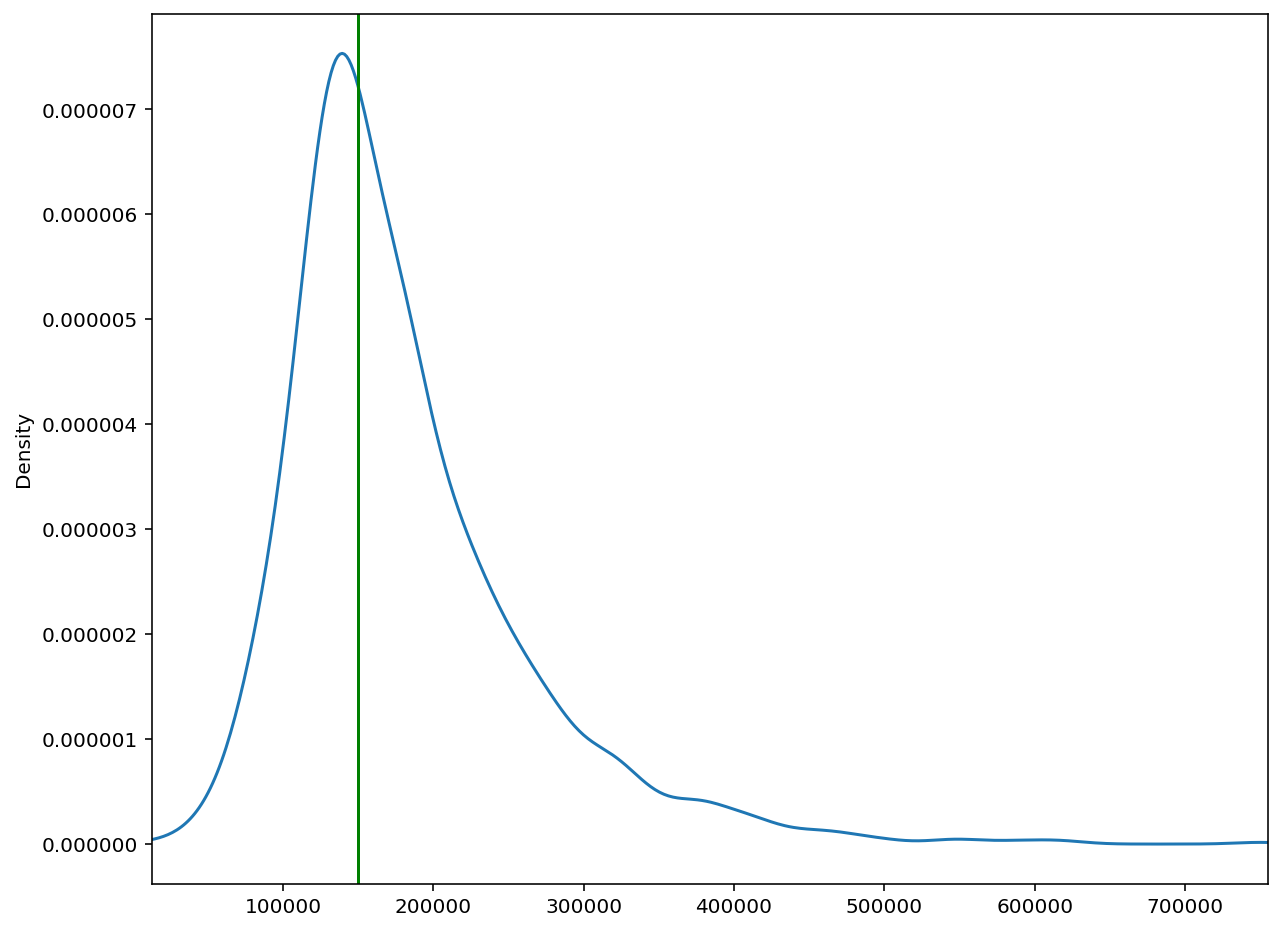

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.figure(figsize=(10,8))
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(), houses['SalePrice'].max()))
plt.axvline(150000, color='Green');

- above distribution is right-skewed
- for right-skewed distributions:
    - most values concentrated in left body of distribution, where peak will form (and mode will be)
    - median usually positioned slightly right from peak 
    - mean will be affected by outliers in right tail, generally pulls mean to the right of the median

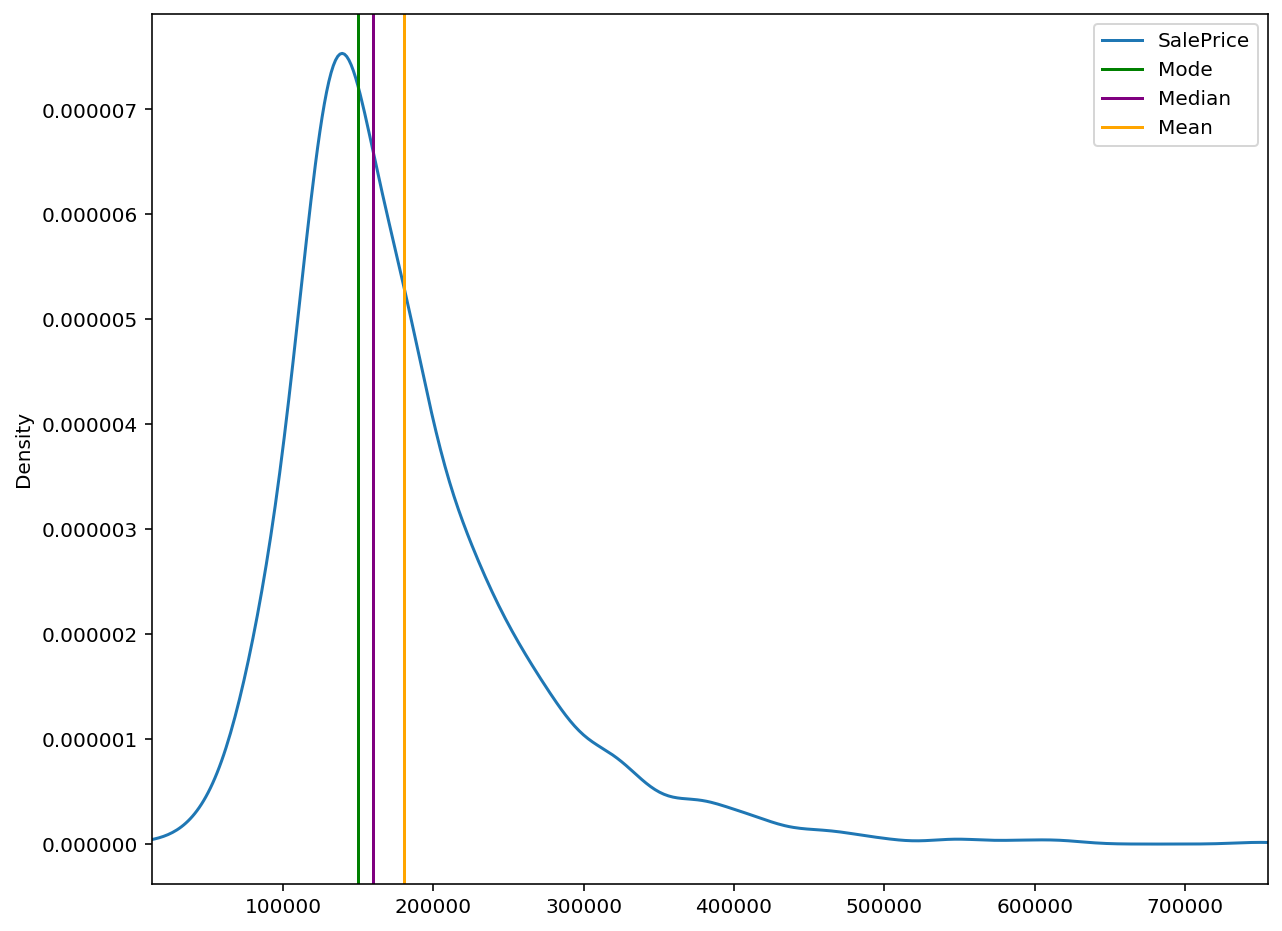

In [66]:
plt.figure(figsize=(10,8))
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(), houses['SalePrice'].max()))
plt.axvline(150000, color='Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'purple', label='Median')
plt.axvline(houses['SalePrice'].mean(), color='orange', label='Mean')
plt.legend();

- for left-skewed distribution, direction is revered
    - mean is positioned to left of median
    - median is to the left of the mode
- see example of `Year Built` variable below for left-skewed distribution

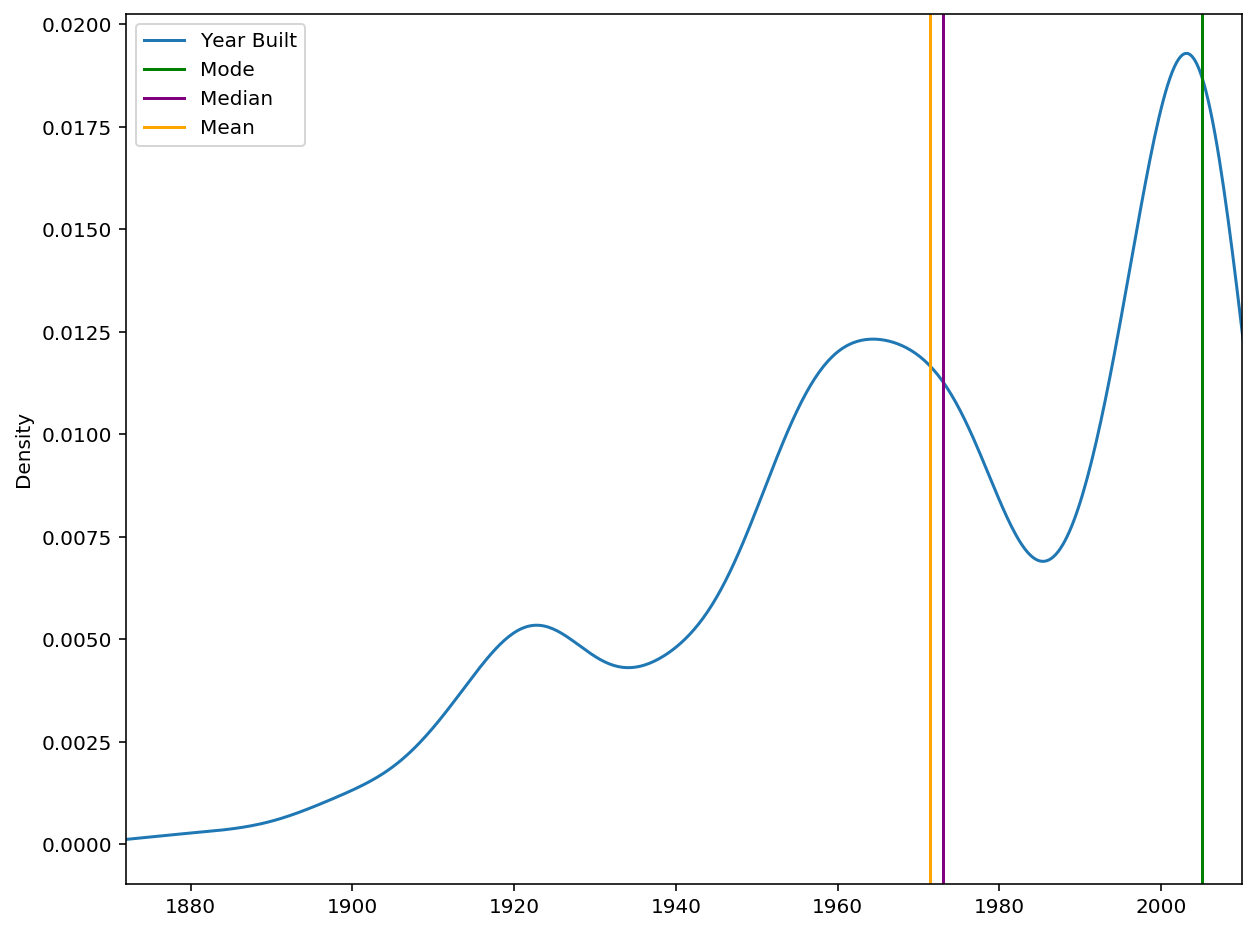

In [73]:
plt.figure(figsize=(10,8))
houses['Year Built'].plot.kde(xlim=(houses['Year Built'].min(), houses['Year Built'].max()))
plt.axvline(2005, color='Green', label = 'Mode')
plt.axvline(houses['Year Built'].median(), color = 'purple', label='Median')
plt.axvline(houses['Year Built'].mean(), color='orange', label='Mean')
plt.legend();

- the above guidelines hold trye for most skewed distributions
    - Paul von Hippel has [shown](https://www.tandfonline.com/doi/full/10.1080/10691898.2005.11910556) that there is a few exceptions though

In [74]:
# mean, mode, and median for three distributions 
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

# what is the skew of the first distribution?
shape_1 = 'right skew'

# what is the skew of the second distribution?
shape_2 = 'right skew'

# what is the skew of the third distribution?
shape_3 = 'left skew'

## _Symmetrical Distributions_

- mean, median, and mode also predictable for symmetrical distributions
    - mean and median are always equal for any perfectly symmetrical distribution
    - mode is where the peak is, so for _normal distribution_ the mode will also be at center
- possible to have a symmetrical distribution with more than one peak
    - means mode won't be at center
- _uniform distribution_ doesn't have any peaks, means there is no mode
- in practice, almost never work with perfectly symmetrical distributions

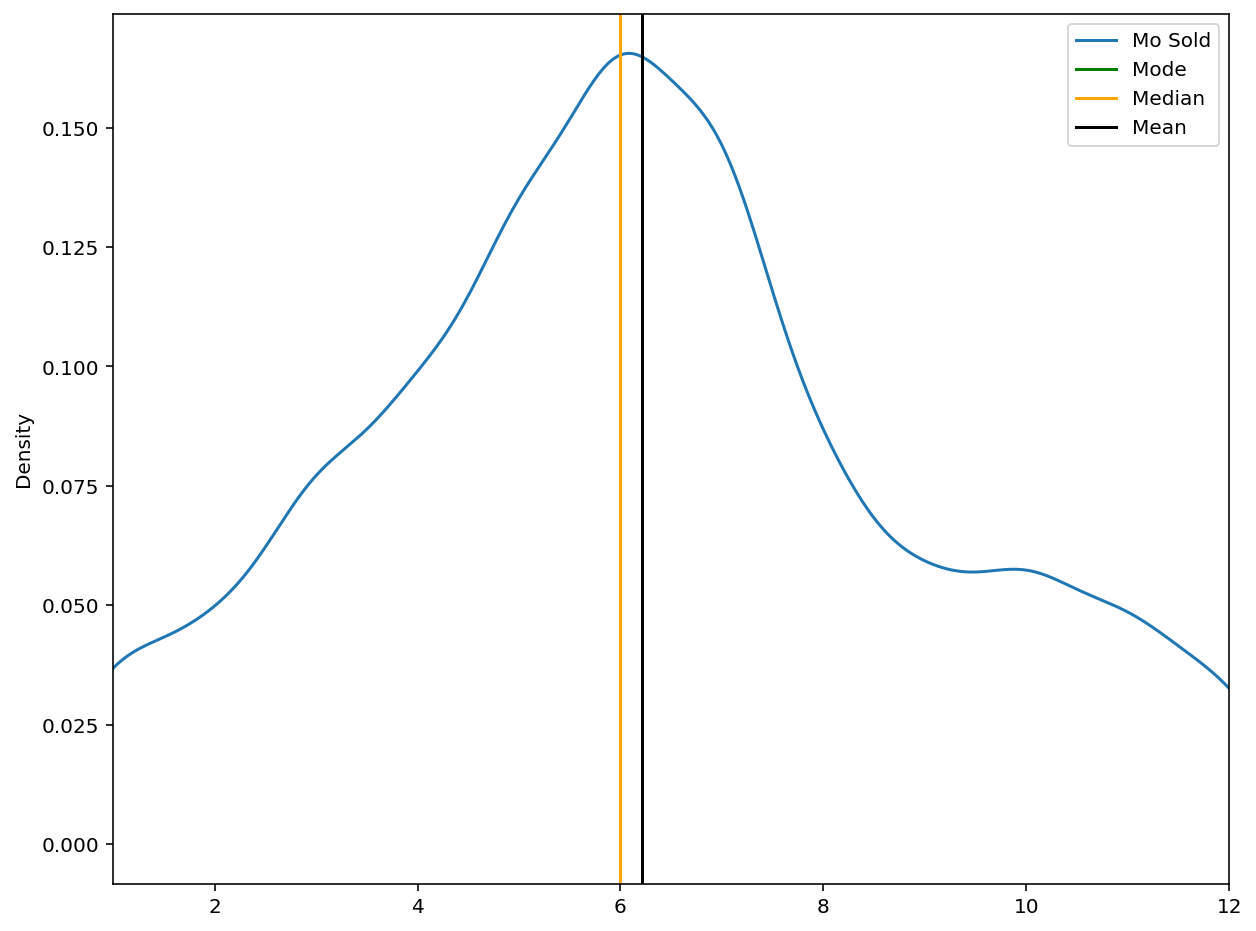

In [87]:
# plot a kernel desnity plot for Mo Sold variable
plt.figure(figsize=(10,8))
houses['Mo Sold'].plot.kde(xlim=(1,12))
plt.axvline(houses['Mo Sold'].mode()[0], color='Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'orange', label='Median')
plt.axvline(houses['Mo Sold'].mean(), color='black', label='Mean')
plt.legend();

## _Summary of the Mean, Median and Mode_